In [27]:
from project_catalog.utils import get_galactic_binary_names
from project_catalog.galactic_binary import GalacticBinary
from project_catalog import compute_1d_hdrs, compute_sky_location_hdr, compute_8d_hdr

from matplotlib import pyplot as plt

import pandas as pd
import numpy as np
from tqdm import tqdm

In [2]:
names = get_galactic_binary_names()

In [10]:
gb = GalacticBinary.load_feather(names[0])

Loaded LDC0023810973 with 2013 samples and 1 candidates.


In [12]:
hdrs = pd.read_feather('../data/hdrs.feather')

In [13]:
hdrs

,Name,Candidate,SNR,Frequency HDR,Amplitude HDR,Inclination HDR,Initial Phase HDR,Ecliptic Latitude HDR,Ecliptic Longitude HDR,Polarization HDR,Frequency Derivative HDR,8D HDR
0,LDC0023810973,22136087.0,153.770517,0.578293,0.269687,0.346547,0.248262,0.400464,0.880082,0.890101,0.126584,0.758073
1,LDC0041226577,11769726.0,27.754678,0.269313,0.951452,0.960546,0.840589,0.645099,0.017666,0.932543,0.492805,0.955210
2,LDC0030125413,19763412.0,10.124382,0.980377,0.923026,0.996087,0.894143,0.999168,0.998771,0.110675,0.026567,1.000000
3,LDC0030125413,18673125.0,26.663445,0.969964,0.938921,0.248555,0.081928,0.999168,0.998771,0.075361,0.112998,0.960720
4,LDC0030125413,13789765.0,7.128704,0.099171,0.046706,0.996087,0.211862,0.999168,0.998771,0.900764,0.021257,0.998091
...,...,...,...,...,...,...,...,...,...,...,...,...
16319,LDC0070835742,12640258.0,127.119801,0.838250,0.013820,0.848424,0.455050,0.488401,0.830714,0.685199,0.842352,0.584449
16320,LDC0038755124,9858100.0,22.671472,0.204768,0.837874,0.912302,0.701682,0.131568,0.765921,0.059475,0.272711,0.708496
16321,LDC0099544948,23528831.0,380.056965,0.600280,0.664811,0.851363,0.346669,0.430392,0.319513,0.077001,0.527203,0.460276
16322,LDC0041193642,10348494.0,15.646238,0.169283,0.198039,0.362287,0.455495,0.870566,0.272917,0.976914,0.239135,0.999164


In [ ]:
def count_matches(names, hdrs, parameter: str = '8D HDR', hdr_threshold=0.9):
    number_candidates = []
    for name in tqdm(names):
        mask_1 = hdrs['Name'] == name
        mask_2 = hdrs[parameter] < hdr_threshold  #  e.g., < 0.9 percentile
        hdrs_filtered = hdrs[mask_1 & mask_2]
        if hdrs_filtered.empty:
            number_candidates.append(0)
            continue
        number_candidates.append(len(hdrs_filtered))
    return np.array(number_candidates)

In [44]:
hdr_columns = [col for col in hdrs.columns if 'HDR' in col]
hdr_columns

['Frequency HDR',
 'Amplitude HDR',
 'Inclination HDR',
 'Initial Phase HDR',
 'Ecliptic Latitude HDR',
 'Ecliptic Longitude HDR',
 'Polarization HDR',
 'Frequency Derivative HDR',
 '8D HDR']

In [47]:
candidates = {}
for parameter in hdr_columns:
    for hdr_threshold in [0.9, 0.8, 0.7, 0.6, 0.5, 0.4, 0.3, 0.2, 0.1]:
        num_candidates = count_matches(names, hdrs, parameter=parameter, hdr_threshold=hdr_threshold)
        candidates[parameter, hdr_threshold] = (np.unique(num_candidates, return_counts=True), num_candidates)

100%|██████████| 12390/12390 [00:06<00:00, 1817.23it/s]


In [48]:
candidates

{('Frequency HDR',
  0.9): ((array([ 0,  1,  2,  3,  4,  5,  6,  7,  8, 10, 11, 19]),
   array([1965, 8906, 1117,  239,   96,   35,   15,    8,    5,    1,    2,
             1])), array([1, 1, 1, ..., 1, 1, 1], shape=(12390,))),
 ('Frequency HDR',
  0.8): ((array([ 0,  1,  2,  3,  4,  5,  6,  7,  8, 10, 11, 17]),
   array([3159, 8127,  842,  162,   63,   19,   13,    1,    1,    1,    1,
             1])), array([1, 1, 1, ..., 1, 1, 1], shape=(12390,))),
 ('Frequency HDR',
  0.7): ((array([ 0,  1,  2,  3,  4,  5,  6,  8,  9, 14]),
   array([4281, 7274,  664,  106,   49,   10,    3,    1,    1,    1])), array([1, 1, 1, ..., 1, 1, 1], shape=(12390,))),
 ('Frequency HDR',
  0.6): ((array([ 0,  1,  2,  3,  4,  5,  7, 12]),
   array([5365, 6423,  486,   89,   22,    3,    1,    1])), array([1, 1, 1, ..., 0, 1, 1], shape=(12390,))),
 ('Frequency HDR',
  0.5): ((array([ 0,  1,  2,  3,  4,  5,  6, 11]),
   array([6467, 5513,  346,   52,    9,    1,    1,    1])), array([0, 1, 1, ..., 0, 1, 1]

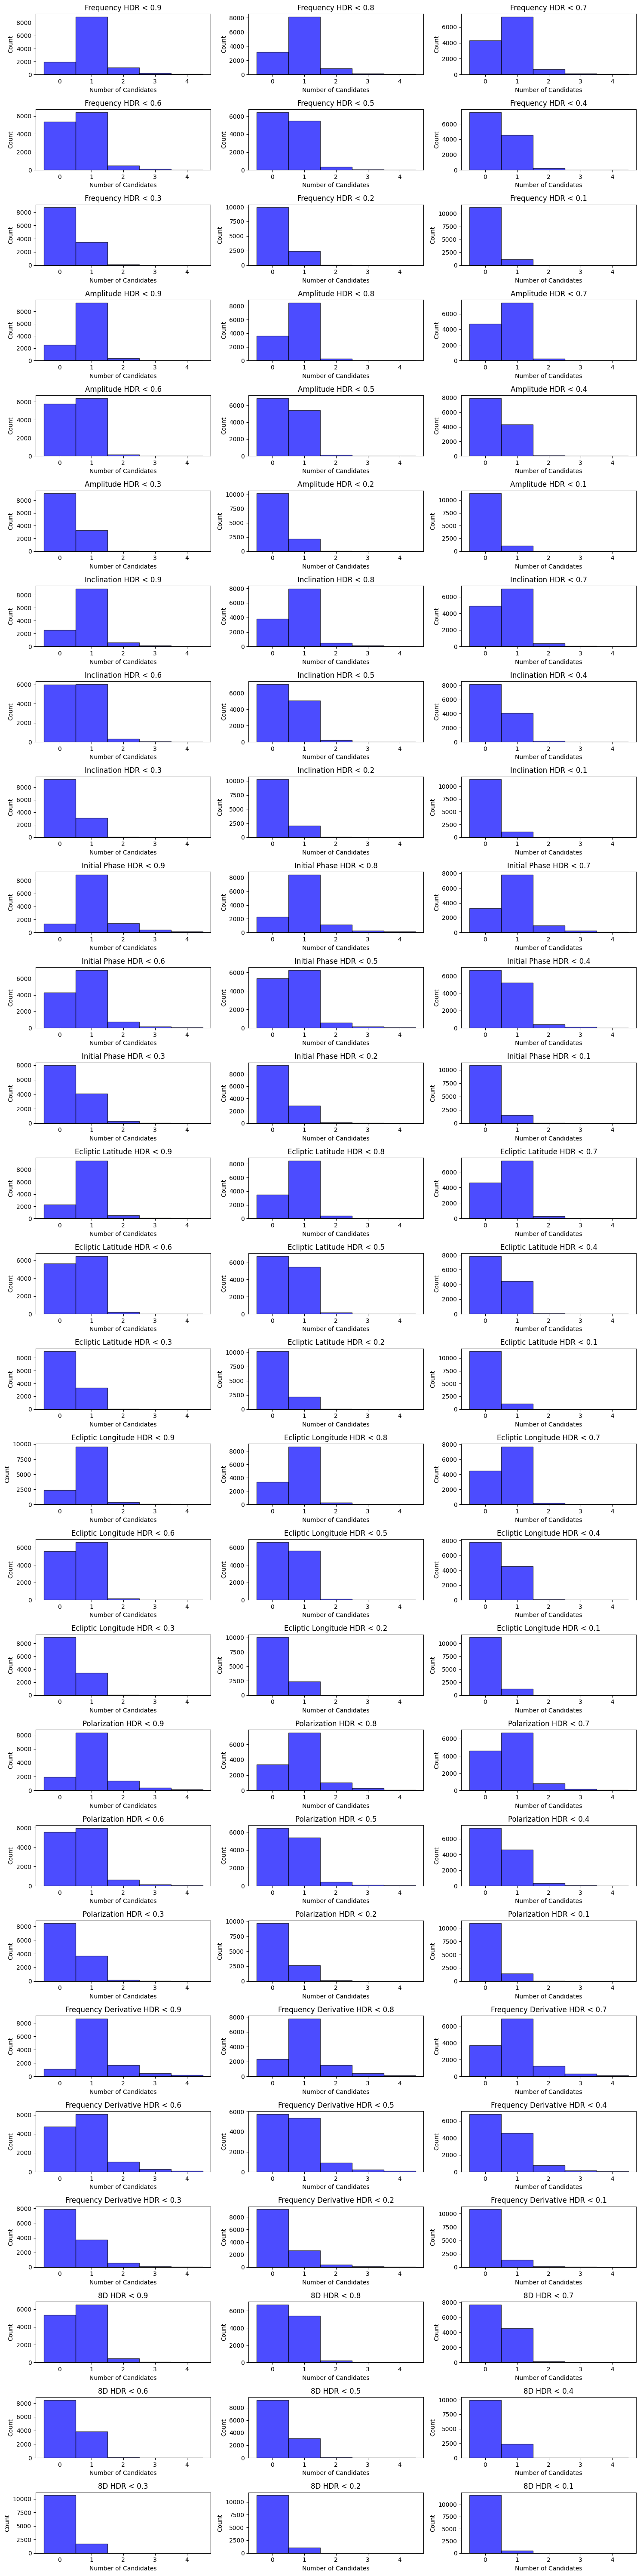

In [57]:
# plot the results
fig, ax = plt.subplots(27, 3, figsize=(15, 60), sharex=False, sharey=False)
for i, (parameter, hdr_threshold) in enumerate(candidates.keys()):
    ax_i = ax[i // 3, i % 3]
    unique_counts, counts = candidates[(parameter, hdr_threshold)]
    ax_i.hist(counts, bins=np.arange(-0.5, 5.5, 1), alpha=0.7, color='blue', edgecolor='black')
    ax_i.set_title(f'{parameter} < {hdr_threshold}')
    ax_i.set_xlabel('Number of Candidates')
    ax_i.set_ylabel('Count')
    ax_i.set_xticks(np.arange(0, 5, 1))
    # ax_i.set_xticklabels(unique_counts[0], rotation=45)
plt.tight_layout()
plt.savefig('hdr_candidates_distribution.png')
plt.show()

In [ ]:
np.unique(num_candidates, return_counts=True)

(array([0, 1, 2, 3, 4, 5, 6, 7]),
 array([5330, 6515,  440,   78,   18,    6,    1,    2]))

Text(0, 0.5, 'Count')

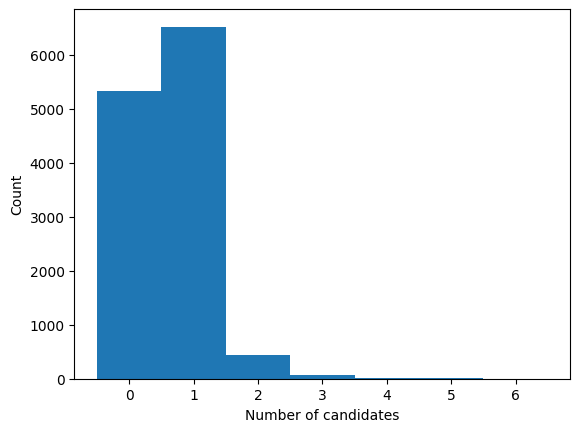

In [ ]:
bins = np.arange(-0.5, 7.5, 1.0)
plt.hist(num_candidates, bins=bins);
plt.xlabel('Number of candidates')
plt.ylabel('Count')

In [19]:
mask_1 = hdrs['Name'] == names[0]
mask_2 = hdrs['8D HDR'] < 0.9
hdrs_filtered = hdrs[mask_1 & mask_2]
print(hdrs_filtered)

            Name   Candidate         SNR  Frequency HDR  Amplitude HDR  \
0  LDC0023810973  22136087.0  153.770517       0.578293       0.269687   

   Inclination HDR  Initial Phase HDR  Ecliptic Latitude HDR  \
0         0.346547           0.248262               0.400464   

   Ecliptic Longitude HDR  Polarization HDR  Frequency Derivative HDR  \
0                0.880082          0.890101                  0.126584   

     8D HDR  
0  0.758073  


In [9]:
count_matches(names[0])

Loaded LDC0023810973 with 2013 samples and 1 candidates.
         Name     Amplitude  Ecliptic Latitude  Ecliptic Longitude  Frequency  \
0  22136087.0  4.759251e-23           -0.34068            4.500688   0.002381   

   Frequency Derivative  Inclination  Initial Phase  Polarization         SNR  \
0          7.125864e-17     2.340469       1.628256      6.234894  153.770517   

   Detached  
0         1  
num_matches =  1
